# Import package and load dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!ls

ingredients.csv               recette_data_analysis.ipynb
recette_data_analysis-2.ipynb recipes.csv
recette_data_analysis-3.ipynb


In [3]:
ingredients=pd.read_csv("ingredients.csv")
recipes=pd.read_csv("recipes.csv")

In [4]:
pd.set_option("max_rows", 20)
pd.set_option("max_colwidth", 50)

# Utils

In [5]:
def fastcheck(data,drop=True):
    print('Data shape:\n',data.shape,\
          '\n\nColumns name:\n',list(data.columns),\
          '\n\nDatas type:\n',data.dtypes,'\n\nNull data:\n',\
          data.isnull().sum().sort_values(ascending=False)/len(data)*100)
    if data.duplicated().sum() > 0:
        print(f'\n\n{data.duplicated().sum()} duplicated data')
        if drop==True:
            data = data.drop_duplicates()
            print('\nDrop duplicates done : new data shape:\n',data.shape)
        else:
            print('\nDrop duplicates not done : data shape unchanged')
    else:
        print('No duplicate')
    data.sample(10)
    return data

# Display raw data recipes and ingredients dataframes

## Ingredients

In [6]:
ingredients

,recipe_id,ingredient
0,10534,6 pommes (des Canada par exemple)
1,10534,150 g de cassonade
2,10534,150 g de farine de blé
3,10534,1 petite cuillère de cannelle en poudre
4,10534,1 sachet de sucre vanillé
...,...,...
578325,532201,2 plaques de saumon fumé
578326,532201,25 g de beurre
578327,532201,4 citrons verts
578328,532201,4 oeufs


## Recipes

In [7]:
recipes

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps
0,10534,https://www.marmiton.org/recettes/recette_le-c...,Le crumble aux pommes du Chat qui Tousse,Dessert,Préchauffer le four à 210°C (thermostat 7). \n...
1,10531,https://www.marmiton.org/recettes/recette_esca...,Escalopes lucullus à la cocotte,Plat principal,"Coupez l'oignon en petits morceaux, faites rev..."
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ..."
3,10530,https://www.marmiton.org/recettes/recette_lapi...,Lapin au vin blanc (à la cocotte),Plat principal,Faire revenir les échalotes et les lardons dan...
4,10528,https://www.marmiton.org/recettes/recette_truf...,Truffes en chocolat,Confiserie,La veille : faire fondre le chocolat au bain-m...
...,...,...,...,...,...
70598,532439,https://www.marmiton.org/recettes/recette_buch...,Bûche de Noël au chocolat et crêpes dentelles,Dessert,Faire fondre les chocolats au bain marie avec ...
70599,532434,https://www.marmiton.org/recettes/recette_cook...,Cookies aux noix de pécan et au chocolat,Dessert,Pour le beurre de pécan : Faire fondre le beur...
70600,532401,https://www.marmiton.org/recettes/recette_sand...,Sando au poulet,Plat principal,Couper le poulet en morceaux de 5/6cm. \n\n Ba...
70601,532213,https://www.marmiton.org/recettes/recette_grat...,Gratin pomme de terre et panais,Accompagnement,Éplucher les pommes de terre et le panais et l...


# Exploration of recipes

## Check recipes  : 70 603 rows with 18 duplicates (<0,03%)  and 0 null

In [8]:
recipes=fastcheck(recipes)

Data shape:
 (70603, 5) 

Columns name:
 ['recipe_id', 'recipe_url', 'recipe_title', 'recipe_type', 'recipe_steps'] 

Datas type:
 recipe_id        int64
recipe_url      object
recipe_title    object
recipe_type     object
recipe_steps    object
dtype: object 

Null data:
 recipe_id       0.0
recipe_url      0.0
recipe_title    0.0
recipe_type     0.0
recipe_steps    0.0
dtype: float64


18 duplicated data

Drop duplicates done : new data shape:
 (70585, 5)


## Check recipe_steps (=instructions) format

### Add number of sentences in recipes in new column

In [9]:
#Count the number of sentences using punctuation "." and store it in field nb_sentences
#Warning : assumes that each sentence ends with "." (! or no punctuation is not counted)
recipes["nb_sentences"]=recipes["recipe_steps"].apply(lambda x: x.count("."))


/var/folders/79/kc35gvcn5h3dnnrgtwd2z2w40000gn/T/ipykernel_9788/453382256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes["nb_sentences"]=recipes["recipe_steps"].apply(lambda x: x.count("."))


In [10]:
recipes

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps,nb_sentences
0,10534,https://www.marmiton.org/recettes/recette_le-c...,Le crumble aux pommes du Chat qui Tousse,Dessert,Préchauffer le four à 210°C (thermostat 7). \n...,8
1,10531,https://www.marmiton.org/recettes/recette_esca...,Escalopes lucullus à la cocotte,Plat principal,"Coupez l'oignon en petits morceaux, faites rev...",3
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ...",0
3,10530,https://www.marmiton.org/recettes/recette_lapi...,Lapin au vin blanc (à la cocotte),Plat principal,Faire revenir les échalotes et les lardons dan...,6
4,10528,https://www.marmiton.org/recettes/recette_truf...,Truffes en chocolat,Confiserie,La veille : faire fondre le chocolat au bain-m...,7
...,...,...,...,...,...,...
70597,532440,https://www.marmiton.org/recettes/recette_ciga...,Cigare au poulet et au chèvre,Plat principal,Dénerver et couper le poulet en fines lamelles...,5
70598,532439,https://www.marmiton.org/recettes/recette_buch...,Bûche de Noël au chocolat et crêpes dentelles,Dessert,Faire fondre les chocolats au bain marie avec ...,14
70599,532434,https://www.marmiton.org/recettes/recette_cook...,Cookies aux noix de pécan et au chocolat,Dessert,Pour le beurre de pécan : Faire fondre le beur...,15
70600,532401,https://www.marmiton.org/recettes/recette_sand...,Sando au poulet,Plat principal,Couper le poulet en morceaux de 5/6cm. \n\n Ba...,11


### Median of 8 sentences by instruction (based on "." occurence)

nb_sentences    8.0
dtype: float64

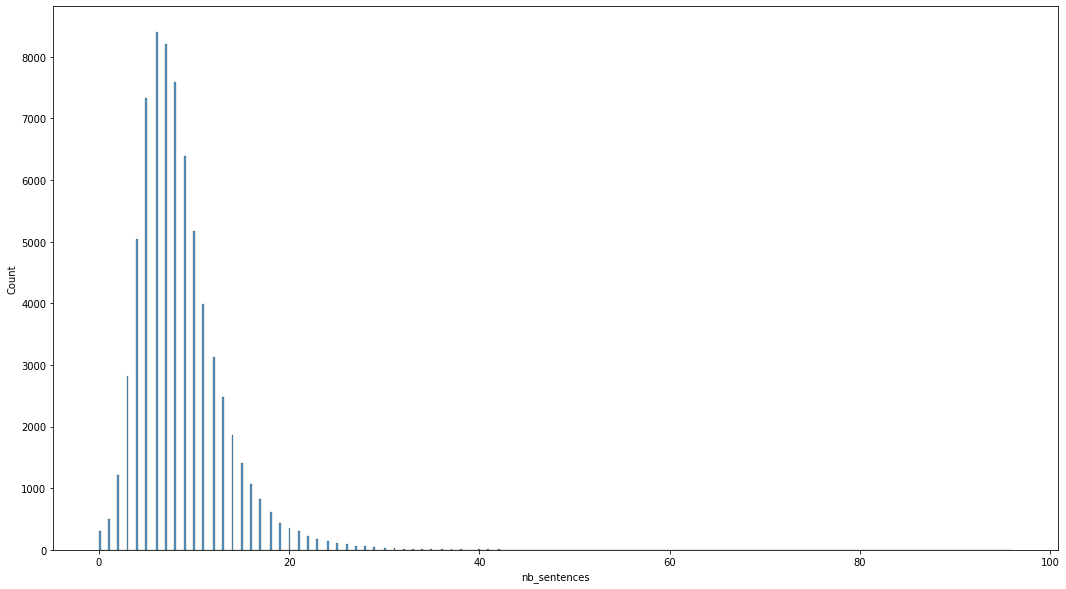

In [11]:
plt.figure(figsize=(18, 10))
sns.histplot(recipes['nb_sentences'])#, kde=True);
recipes[['nb_sentences']].median()

In [12]:
recipes.query("nb_sentences == 0")

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps,nb_sentences
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ...",0
106,10717,https://www.marmiton.org/recettes/recette_sole...,Soleil d'Hawaii,Soleil d'hawaii,- Battre les 4 jaunes d'oeufs \n\n - Ajouter l...,0
979,12001,https://www.marmiton.org/recettes/recette_sauc...,Sauce / marinade Teriyaki,Sauce salée,Mélanger simplement tous les ingrédients !,0
1517,12776,https://www.marmiton.org/recettes/recette_sauc...,"Sauce pour salade figues, foie gras et noix",Sauce salée,Une simple émulsion et le tour est joué !,0
2086,13516,https://www.marmiton.org/recettes/recette_glac...,Glace à la banane,Dessert,"Passer tout ça au mixer, et faire prendre en s...",0
...,...,...,...,...,...,...
70170,530227,https://www.marmiton.org/recettes/recette_poiv...,Poivron farcis veggy,Plat principal,"Coupez vos poivrons en deux, épépinez les et b...",0
70335,530831,https://www.marmiton.org/recettes/recette_cook...,Cookies fourrés à la pâte a tartiner maison by...,Dessert,Mettre les noisettes a torréfier au four à 160...,0
70464,531305,https://www.marmiton.org/recettes/recette_spri...,St-Germain Spritz,Apéritif ou buffet,Mettre les glaçons dans le verre \n\n Verser t...,0
70489,531692,https://www.marmiton.org/recettes/recette_tort...,Tortilla de riz au poulet et mozzarella de Fré...,Tortilla de riz au poulet et mozzarella de fré...,Faire cuire le riz 10 à 15min dans une cassero...,0


In [13]:
print(list(recipes.query("recipe_id==530831").iloc[:,4])[0])

Mettre les noisettes a torréfier au four à 160°C pendant 20 minutes 

 Mixer les 100g de noisettes jusqu'a obtention d'une pâte  

 Ajouter les chocolats dans le mixeur 

 Faire bouillir la crème et sucre  

 Verser progressivement la crème bouillante sur les chocolats tout en mixant  

 Mouler dans des moules en silicone rond de 4cm de diamètre la préparation et réservé la pendant minimum 2h au congélateur  

 Pour les cookies, mélanger le sucre muscovado, la poudre de noisette et le beurre pommade jusqu'a obtenir un mélange homogène 

 Ajouter l'oeuf  

 Ajouter la farine, la levure chimique et le sel 

 Concasser les noisettes et le chocolat  

 Ajouter les au mélange précédent 

 Diviser la pâte à cookies en boules de 50g 

 Démouler les inserts de pâte a tartiner et placer un insert au milieux de chaque cookies 

 Façonner les cookies de manière a enfermer l'insert de pâte a tartiner a l'intérieur du cookie bien hermétiquement  

 Disposer vos cookies sur une plaque avec une feuil

### Random check of instructions format

In [14]:
#Print n random
n=3
for i in range(n):
    print("\n =>RANDOM RECIPE ",str(i),"\n",list(recipes.sample(1)[["recipe_steps"]].iloc[0])[0])



 =>RANDOM RECIPE  0 
 Faire fondre dans une terrine placée au bain-marie, le chocolat cassé en morceaux avec le lait. Quand le chocolat est bien mou, remuer le mélange de façon à obtenir une crème bien lisse. Retirer du bain-marie.  

 Ajouter le beurre, le sucre glace, la vanille liquide.  

 Concasser grossièrement et régulièrement les biscuits ; ajouter à la préparation, mélanger pour obtenir une pâte homogène.  

 Verser dans un moule à cake.  

 Mettre au réfrigérateur jusqu'au lendemain.  

 Démouler avec précaution.

 =>RANDOM RECIPE  1 
 Faire cuire les pâtes "al dente" ; tout l'monde sait l'faire ; sinon, y'a  de chouettes recettes sur marmiton ;) 

 Dans une poêle, faire chauffer un peu d'huile, et cuire le saumon : 

 Si avec peau : coté peau 

 Si sans peau ... ben sur l'un des cotés ! 

 Attention : Mettre le saumon dans la poêle bien chaude, et, au bout de 5 min, vérifier la cuisson : il doit être encore "léger rose" (pas très cuit) au milieu, mais la poêle doit sembler 

In [15]:
#Return a print of 5 random recipe_steps from the recipies table
def random_check_instructions(recipes,nbprint,col):
    recipes_sample=recipes.sample(500)
    for i in range(nbprint):
        print(f"\n---> RANDOM RECIPIE {i} \nTitle : {recipes_sample.iloc[i,2]}")
        print(f"Nb sentences : {recipes_sample.iloc[i,5]}")
        print(f"Recipe id : {recipes_sample.iloc[i,0]}\n")
        print(recipes_sample.iloc[i,col])

In [16]:
random_check_instructions(recipes,nbprint=5,col=4)


---> RANDOM RECIPIE 0 
Title : Moelleux aux poires
Nb sentences : 5
Recipe id : 17629

Battre les oeufs et le sucre ensemble jusqu'à ce que le mélange blanchisse et que le sucre soit bien fondu. 

 Ajoutez le beurre fondu, la farine, le sel et la levure pour former une pâte fluide. 

 Versez la pâte dans un moule beurré. 

 Disposez les poires en lamelles sur la pâte. 

 Mettez au four à thermostat 5/6 (170°C) pendant 30 min environ.

---> RANDOM RECIPIE 1 
Title : Ragout de ragondin
Nb sentences : 10
Recipe id : 11286

Faire revenir les morceaux de ragondin à feu vif dans une sauteuse avec une cuillerée à soupe d'huile d'arachide jusqu'à ce qu'ils soient bien dorés. Egoutter et réserver. 

 Faire revenir ensuite dans le même récipient carottes, céleri, poireaux et oignons coupés en petits morceaux. 

 Cuire à feu vif pendant 5 min. 

 Ajouter les tomates en morceaux, l'ail et le persil haché, le bouquet garni. Saler et poivrer. 

 Baisser le feu et laisser mijoter 15 min environ. 

 

### Clean text in instructions

In [17]:
import textwrap
#This function is to clean the instructions of recipes
def clean_text(text):
    #1. Remove whitespace before each new line
    text=text.replace("\n\n ","\n\n")
    
    #2. Replace multiple punctuation 
    #USE REGEX ?
    return text

In [18]:
recipes["cleaned_instructions"]=recipes["recipe_steps"].apply(lambda x: clean_text(x))
recipes

/var/folders/79/kc35gvcn5h3dnnrgtwd2z2w40000gn/T/ipykernel_9788/1773282809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes["cleaned_instructions"]=recipes["recipe_steps"].apply(lambda x: clean_text(x))


,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps,nb_sentences,cleaned_instructions
0,10534,https://www.marmiton.org/recettes/recette_le-c...,Le crumble aux pommes du Chat qui Tousse,Dessert,Préchauffer le four à 210°C (thermostat 7). \n...,8,Préchauffer le four à 210°C (thermostat 7). \n...
1,10531,https://www.marmiton.org/recettes/recette_esca...,Escalopes lucullus à la cocotte,Plat principal,"Coupez l'oignon en petits morceaux, faites rev...",3,"Coupez l'oignon en petits morceaux, faites rev..."
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ...",0,"- hacher (pas trop fin) le foie, le lard, les ..."
3,10530,https://www.marmiton.org/recettes/recette_lapi...,Lapin au vin blanc (à la cocotte),Plat principal,Faire revenir les échalotes et les lardons dan...,6,Faire revenir les échalotes et les lardons dan...
4,10528,https://www.marmiton.org/recettes/recette_truf...,Truffes en chocolat,Confiserie,La veille : faire fondre le chocolat au bain-m...,7,La veille : faire fondre le chocolat au bain-m...
...,...,...,...,...,...,...,...
70597,532440,https://www.marmiton.org/recettes/recette_ciga...,Cigare au poulet et au chèvre,Plat principal,Dénerver et couper le poulet en fines lamelles...,5,Dénerver et couper le poulet en fines lamelles...
70598,532439,https://www.marmiton.org/recettes/recette_buch...,Bûche de Noël au chocolat et crêpes dentelles,Dessert,Faire fondre les chocolats au bain marie avec ...,14,Faire fondre les chocolats au bain marie avec ...
70599,532434,https://www.marmiton.org/recettes/recette_cook...,Cookies aux noix de pécan et au chocolat,Dessert,Pour le beurre de pécan : Faire fondre le beur...,15,Pour le beurre de pécan : Faire fondre le beur...
70600,532401,https://www.marmiton.org/recettes/recette_sand...,Sando au poulet,Plat principal,Couper le poulet en morceaux de 5/6cm. \n\n Ba...,11,Couper le poulet en morceaux de 5/6cm. \n\nBat...


In [19]:
random_check_instructions(recipes,nbprint=5,col=6)


---> RANDOM RECIPIE 0 
Title : Beignets d'acacia
Nb sentences : 4
Recipe id : 12457

Faire une pâte à crêpes épaisse avec les oeufs, la farine, le lait; Ajouter l'huile et l'eau de fleur d'oranger. Laisser reposer un moment. 

Prendre alors un petit rameau d'acacia (non lavé car sinon la fleur  perd son parfum, secouer seulement), le tremper dans la pâte et cuire à la poêle préalablement huilée et très chaude. 

Procéder comme pour les crêpes : cuire d'un côté, et retourner pour cuire l'autre côté.

---> RANDOM RECIPIE 1 
Title : Pain de saumon fouré au foie gras
Nb sentences : 8
Recipe id : 84262

Dérouler la pâte feuilletée(ou la faire si vous en avez le courage). 

Couper dans l'épaisseur les 4 pavés de saumon (ne pas laisser la peau). Émincer les 2 blanc de poireaux et les faire blanchir(dans l'eau) avec un peu de beurre. 

Puis dans votre pâte, déposer dans cet ordre:saumon, poireau, foie gras, poireau, saumon. Fermer votre pain et le badigeonner d'un jaune d'oeuf. Le mettre au f

### Check recipe_type

In [20]:
#It is expected 9 recipe_type, but we have 25155 !!
print(recipes.recipe_type.nunique())

25155


(38291, 7)
(70585, 7)


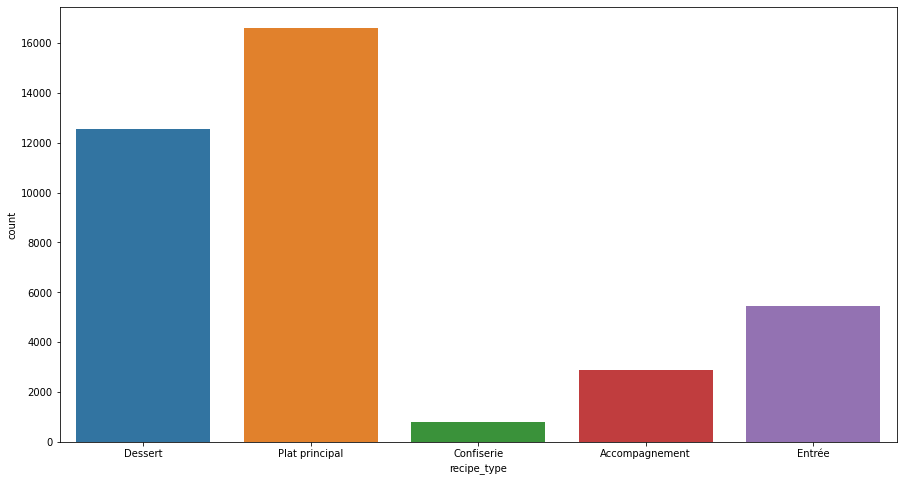

In [21]:
known_types=["Entrée", "Plat principal", "Dessert", "Amuse-gueule", "Accompagnement", "Sauce", "Boisson", "Confiserie", "Conseil"]
mask = recipes['recipe_type'].isin(known_types)
recipes[mask]

plt.figure(figsize=(15,8))
sns.countplot(x="recipe_type", data=recipes[mask])

# En dropant tous les types non-connus on réduit le dataset presque de moitié : 70 585 -> 38 291

print(recipes[mask].shape)
print(recipes.shape)


# Exploration of ingredients

## Check ingredients : 578 330 rows with 2 694 duplicates (<0,5%) and 0 null

In [22]:
ingredients_new=fastcheck(ingredients)

Data shape:
 (578330, 2) 

Columns name:
 ['recipe_id', 'ingredient'] 

Datas type:
 recipe_id      int64
ingredient    object
dtype: object 

Null data:
 recipe_id     0.0
ingredient    0.0
dtype: float64


2694 duplicated data

Drop duplicates done : new data shape:
 (575636, 2)


In [23]:
ingredients_new

,recipe_id,ingredient
0,10534,6 pommes (des Canada par exemple)
1,10534,150 g de cassonade
2,10534,150 g de farine de blé
3,10534,1 petite cuillère de cannelle en poudre
4,10534,1 sachet de sucre vanillé
...,...,...
578316,532213,75 g de beurre
578317,532213,pain rassis
578318,532213,muscade rapée
578319,532213,50 g de beurre


In [24]:
temp=ingredients.groupby("recipe_id").count().sort_values("ingredient")

In [25]:
temp

,ingredient
recipe_id,
65558,1
36648,1
314361,1
21905,1
47643,1
...,...
223949,42
321549,42
33107,43


In [26]:
temp.query("ingredient==2")

,ingredient
recipe_id,
58933,2
230181,2
50865,2
18676,2
223351,2
...,...
174825,2
32964,2
23215,2


In [27]:
ingredients.query("recipe_id==65924")

,recipe_id,ingredient
309837,65924,5 belles tranches de saumon fumé
309838,65924,1 boursin ail et fines herbes


# # On drop moins de 2 ingrédients et plus que 10 -> reste 388 342 rows

In [28]:
def resample_ingredients(ingredients,min_ingredient=2, max_ingredient=10):
    temp=ingredients.groupby("recipe_id").count()
    temp=temp.query(f"{min_ingredient}<=ingredient<={max_ingredient}")
    return ingredients[ingredients["recipe_id"].isin(temp.index)]

In [29]:
output2=resample_ingredients(ingredients)
output2

,recipe_id,ingredient
0,10534,6 pommes (des Canada par exemple)
1,10534,150 g de cassonade
2,10534,150 g de farine de blé
3,10534,1 petite cuillère de cannelle en poudre
4,10534,1 sachet de sucre vanillé
...,...,...
578260,532439,200 g d' éclats d’amandes grillées
578261,532439,35 crêpes dentelles
578262,532439,1 café serré
578263,532439,4 crêpes dentelles


ingredient    8.0
dtype: float64

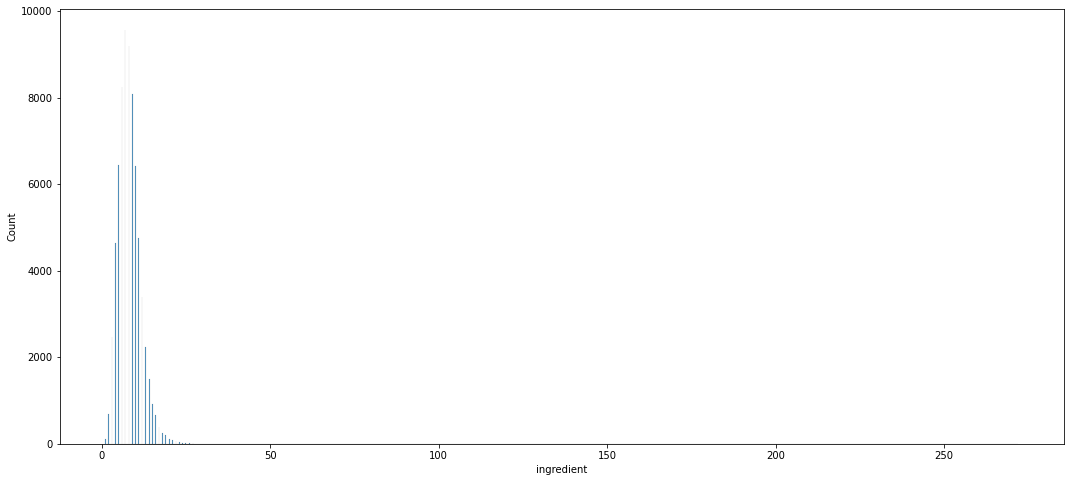

In [30]:
plt.figure(figsize=(18, 8))
sns.histplot(temp['ingredient'])#, kde=True);
temp[['ingredient']].median()

In [31]:
df_temp = df_temp.drop_duplicates()
df_temp


NameError: name 'df_temp' is not defined

# TODO analyse des données (pourcentage sucré et salé, nombre d'ingrédients, taille moyenne recette, recette 1 seul ingrédient, recette pas d'ingrédient), enlever les instructions inférieurs à 1 phrase (ou un mot, ou autre critere)